In [1]:
import os
import os.path
import glob
import numpy as np
import Image,leargist
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import svm

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
import sklearn_evaluation.plot as skplot
from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt
import matplotlib.cm as colormap
plt.rcParams['image.cmap'] = 'Paired'

import numpy as np
np.random.seed(1)

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [2]:
imagedir = "Datasets/ByFamilyImagesWidth"

In [3]:
cur_dir = os.getcwd()
os.chdir(imagedir)  # the parent folder with sub-folders

# Get number of samples per family
list_fams = sorted(os.listdir(os.getcwd()), key=str.lower)  # vector of strings with family names
no_imgs = []  # No. of samples per family
for i in range(len(list_fams)):
    os.chdir(list_fams[i])
    len1 = len(glob.glob('*.png'))  # assuming the images are stored as 'png'
    no_imgs.append(len1)
    os.chdir('..')
num_samples = np.sum(no_imgs)  # total number of all samples

# Compute the labels
y = np.zeros(num_samples)
pos = 0
label = 0
for i in no_imgs:
    print ("Label:%2d\tFamily: %15s\tNumber of images: %d" % (label, list_fams[label], i))
    for j in range(i):
        y[pos] = label
        pos += 1
    label += 1
num_classes = label

# Compute the features
X = np.zeros((num_samples, 320))
cnt = 0
list_paths = [] # List of image paths
print("Processing images ...")
for i in range(len(list_fams)):
    for img_file in glob.glob(list_fams[i]+'/*.png'):
        #print("[%d] Processing image: %s" % (cnt, img_file))
        im = Image.open(img_file)
        im1 = im.resize((64,64),Image.ANTIALIAS); # for faster computation
        des = leargist.color_gist(im1)
        X[cnt] = des[0:320]
        cnt += 1
print("Images processed: %d" %(cnt))

os.chdir(cur_dir)

Label: 0	Family:         allaple	Number of images: 362
Label: 1	Family:           alman	Number of images: 325
Label: 2	Family:          autoit	Number of images: 261
Label: 3	Family:            daws	Number of images: 466
Label: 4	Family:            delf	Number of images: 359
Label: 5	Family:         gamarue	Number of images: 259
Label: 6	Family:          ibryte	Number of images: 347
Label: 7	Family:          loring	Number of images: 285
Label: 8	Family:          mydoom	Number of images: 578
Label: 9	Family:          qukart	Number of images: 253
Label:10	Family:          ramnit	Number of images: 506
Label:11	Family:          sality	Number of images: 1401
Label:12	Family:          simbot	Number of images: 1148
Label:13	Family:       softpulse	Number of images: 912
Label:14	Family:          viking	Number of images: 183
Label:15	Family:         virlock	Number of images: 373
Label:16	Family:          vobfus	Number of images: 405
Label:17	Family:          wapomi	Number of images: 345
Label:18

In [4]:
X.shape

(10136, 320)

In [5]:
# Training top_model
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=1)

top_model = GridSearchCV(svm.SVC(), param_grid=param_grid, cv=cv, verbose=10, n_jobs=10)
top_model.fit(X,y)  # Training 

Fitting 5 folds for each of 169 candidates, totalling 845 fits
[CV] C=0.01, gamma=1e-09 .............................................
[CV] C=0.01, gamma=1e-09 .............................................
[CV] C=0.01, gamma=1e-09 .............................................
[CV] C=0.01, gamma=1e-09 .............................................
[CV] C=0.01, gamma=1e-09 .............................................
[CV] C=0.01, gamma=1e-08 .............................................
[CV] C=0.01, gamma=1e-08 .............................................
[CV] C=0.01, gamma=1e-08 .............................................
[CV] C=0.01, gamma=1e-08 .............................................
[CV] C=0.01, gamma=1e-08 .............................................
[CV] .............. C=0.01, gamma=1e-08, score=0.138067, total= 1.3min
[CV] C=0.01, gamma=1e-07 .............................................
[CV] .............. C=0.01, gamma=1e-09, score=0.138067, total= 1.3min
[CV] C=0.01, g

[Parallel(n_jobs=10)]: Done   5 tasks      | elapsed:  2.0min


[CV] .............. C=0.01, gamma=1e-09, score=0.138067, total= 1.3min
[CV] C=0.01, gamma=1e-06 .............................................
[CV] .............. C=0.01, gamma=1e-09, score=0.138067, total= 1.3min
[CV] C=0.01, gamma=1e-06 .............................................
[CV] .............. C=0.01, gamma=1e-09, score=0.138067, total= 1.3min
[CV] C=0.01, gamma=1e-06 .............................................
[CV] .............. C=0.01, gamma=1e-06, score=0.138067, total= 1.1min
[CV] C=0.01, gamma=1e-05 .............................................
[CV] .............. C=0.01, gamma=1e-06, score=0.138067, total= 1.1min
[CV] C=0.01, gamma=1e-05 .............................................


[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:  3.8min


[CV] .............. C=0.01, gamma=1e-07, score=0.138067, total= 1.2min
[CV] C=0.01, gamma=1e-05 .............................................
[CV] .............. C=0.01, gamma=1e-07, score=0.138067, total= 1.2min
[CV] C=0.01, gamma=1e-05 .............................................
[CV] .............. C=0.01, gamma=1e-07, score=0.138067, total= 1.2min
[CV] .............. C=0.01, gamma=1e-07, score=0.138067, total= 1.2min
[CV] C=0.01, gamma=1e-05 .............................................
[CV] C=0.01, gamma=0.0001 ............................................
[CV] .............. C=0.01, gamma=1e-07, score=0.138067, total= 1.2min
[CV] C=0.01, gamma=0.0001 ............................................
[CV] .............. C=0.01, gamma=1e-06, score=0.138067, total= 1.2min
[CV] C=0.01, gamma=0.0001 ............................................
[CV] .............. C=0.01, gamma=1e-06, score=0.138067, total= 1.3min
[CV] C=0.01, gamma=0.0001 ............................................
[CV] .

[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:  5.6min


[CV] .............. C=0.01, gamma=1e-05, score=0.138067, total= 1.1min
[CV] C=0.01, gamma=0.001 .............................................
[CV] .............. C=0.01, gamma=1e-05, score=0.138067, total= 1.1min
[CV] C=0.01, gamma=0.001 .............................................
[CV] .............. C=0.01, gamma=1e-05, score=0.138067, total= 1.2min
[CV] C=0.01, gamma=0.001 .............................................
[CV] ............. C=0.01, gamma=0.0001, score=0.138067, total= 1.1min
[CV] C=0.01, gamma=0.001 .............................................
[CV] ............. C=0.01, gamma=0.0001, score=0.138067, total= 1.1min
[CV] C=0.01, gamma=0.01 ..............................................
[CV] ............. C=0.01, gamma=0.0001, score=0.138067, total= 1.2min
[CV] C=0.01, gamma=0.01 ..............................................
[CV] .............. C=0.01, gamma=1e-05, score=0.138067, total= 1.2min
[CV] C=0.01, gamma=0.01 ..............................................
[CV] .

[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:  5.8min


[CV] .............. C=0.01, gamma=0.001, score=0.138067, total= 1.1min
[CV] C=0.01, gamma=0.1 ...............................................
[CV] .............. C=0.01, gamma=0.001, score=0.138067, total= 1.1min
[CV] C=0.01, gamma=0.1 ...............................................
[CV] .............. C=0.01, gamma=0.001, score=0.138067, total= 1.1min
[CV] C=0.01, gamma=0.1 ...............................................
[CV] .............. C=0.01, gamma=0.001, score=0.138067, total= 1.2min
[CV] C=0.01, gamma=0.1 ...............................................
[CV] .............. C=0.01, gamma=0.001, score=0.138067, total= 1.2min
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ............... C=0.01, gamma=0.01, score=0.138067, total= 1.2min
[CV] C=0.01, gamma=1.0 ...............................................
[CV] ............... C=0.01, gamma=0.01, score=0.138067, total= 1.2min
[CV] C=0.01, gamma=1.0 ...............................................
[CV] .

[Parallel(n_jobs=10)]: Done  41 tasks      | elapsed:  9.2min


[CV] ................ C=0.01, gamma=0.1, score=0.138067, total= 1.2min
[CV] C=0.01, gamma=10.0 ..............................................
[CV] ................ C=0.01, gamma=1.0, score=0.366864, total= 1.1min
[CV] C=0.01, gamma=10.0 ..............................................
[CV] ................ C=0.01, gamma=1.0, score=0.366371, total= 1.1min
[CV] C=0.01, gamma=10.0 ..............................................
[CV] ................ C=0.01, gamma=1.0, score=0.362919, total= 1.1min
[CV] C=0.01, gamma=10.0 ..............................................
[CV] ................ C=0.01, gamma=0.1, score=0.138067, total= 1.2min
[CV] C=0.01, gamma=100.0 .............................................
[CV] ................ C=0.01, gamma=0.1, score=0.138067, total= 1.2min
[CV] C=0.01, gamma=100.0 .............................................
[CV] ................ C=0.01, gamma=1.0, score=0.361933, total= 1.1min
[CV] C=0.01, gamma=100.0 .............................................
[CV] .

[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed: 10.8min


[CV] ............... C=0.01, gamma=10.0, score=0.520217, total=  59.1s
[CV] C=0.01, gamma=1000.0 ............................................
[CV] ............... C=0.01, gamma=10.0, score=0.534024, total=  57.8s
[CV] C=0.01, gamma=1000.0 ............................................
[CV] ............... C=0.01, gamma=10.0, score=0.524162, total= 1.1min
[CV] C=0.01, gamma=1000.0 ............................................
[CV] .............. C=0.01, gamma=100.0, score=0.315089, total= 1.4min
[CV] C=0.1, gamma=1e-09 ..............................................
[CV] .............. C=0.01, gamma=100.0, score=0.313116, total= 1.4min
[CV] C=0.1, gamma=1e-09 ..............................................
[CV] .............. C=0.01, gamma=100.0, score=0.319034, total= 1.4min
[CV] C=0.1, gamma=1e-09 ..............................................
[CV] .............. C=0.01, gamma=100.0, score=0.312130, total= 1.4min
[CV] C=0.1, gamma=1e-09 ..............................................
[CV] .

[Parallel(n_jobs=10)]: Done  65 tasks      | elapsed: 13.1min


[CV] ............... C=0.1, gamma=1e-09, score=0.138067, total= 1.2min
[CV] C=0.1, gamma=1e-07 ..............................................
[CV] ............... C=0.1, gamma=1e-09, score=0.138067, total= 1.2min
[CV] C=0.1, gamma=1e-07 ..............................................
[CV] ............... C=0.1, gamma=1e-09, score=0.138067, total= 1.2min
[CV] C=0.1, gamma=1e-07 ..............................................
[CV] ............. C=0.01, gamma=1000.0, score=0.273176, total= 1.6min
[CV] C=0.1, gamma=1e-07 ..............................................
[CV] ............... C=0.1, gamma=1e-09, score=0.138067, total= 1.2min
[CV] C=0.1, gamma=1e-07 ..............................................
[CV] ............... C=0.1, gamma=1e-08, score=0.138067, total= 1.1min
[CV] C=0.1, gamma=1e-06 ..............................................
[CV] ............... C=0.1, gamma=1e-08, score=0.138067, total= 1.1min
[CV] C=0.1, gamma=1e-06 ..............................................
[CV] .

[Parallel(n_jobs=10)]: Done  78 tasks      | elapsed: 15.0min


[CV] ............... C=0.1, gamma=1e-07, score=0.138067, total= 1.2min
[CV] C=0.1, gamma=1e-05 ..............................................
[CV] ............... C=0.1, gamma=1e-07, score=0.138067, total= 1.2min
[CV] C=0.1, gamma=1e-05 ..............................................
[CV] ............... C=0.1, gamma=1e-06, score=0.138067, total= 1.1min
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ............... C=0.1, gamma=1e-06, score=0.138067, total= 1.1min
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ............... C=0.1, gamma=1e-06, score=0.138067, total= 1.1min
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ............... C=0.1, gamma=1e-06, score=0.138067, total= 1.1min
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ............... C=0.1, gamma=1e-06, score=0.138067, total= 1.1min
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .

[Parallel(n_jobs=10)]: Done  93 tasks      | elapsed: 18.4min


[CV] .............. C=0.1, gamma=0.0001, score=0.138067, total= 1.1min
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .............. C=0.1, gamma=0.0001, score=0.138067, total= 1.1min
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ............... C=0.1, gamma=0.001, score=0.138067, total= 1.2min
[CV] C=0.1, gamma=0.1 ................................................
[CV] ............... C=0.1, gamma=0.001, score=0.138067, total= 1.2min
[CV] C=0.1, gamma=0.1 ................................................
[CV] ............... C=0.1, gamma=0.001, score=0.138067, total= 1.2min
[CV] C=0.1, gamma=0.1 ................................................
[CV] ............... C=0.1, gamma=0.001, score=0.138067, total= 1.2min
[CV] C=0.1, gamma=0.1 ................................................
[CV] ............... C=0.1, gamma=0.001, score=0.138067, total= 1.2min
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed: 20.5min


[CV] ................. C=0.1, gamma=0.1, score=0.418639, total= 1.1min
[CV] C=0.1, gamma=10.0 ...............................................
[CV] ................ C=0.1, gamma=0.01, score=0.138067, total= 1.4min
[CV] C=0.1, gamma=10.0 ...............................................
[CV] ................. C=0.1, gamma=1.0, score=0.714990, total=  33.6s
[CV] C=0.1, gamma=100.0 ..............................................
[CV] ................. C=0.1, gamma=1.0, score=0.717456, total=  33.7s
[CV] C=0.1, gamma=100.0 ..............................................
[CV] ................. C=0.1, gamma=1.0, score=0.712032, total=  33.9s
[CV] C=0.1, gamma=100.0 ..............................................
[CV] ................. C=0.1, gamma=1.0, score=0.699211, total=  34.4s
[CV] C=0.1, gamma=100.0 ..............................................
[CV] ................ C=0.1, gamma=10.0, score=0.763807, total=  37.5s
[CV] C=0.1, gamma=100.0 ..............................................
[CV] .

[Parallel(n_jobs=10)]: Done 125 tasks      | elapsed: 23.2min


[CV] .............. C=0.1, gamma=1000.0, score=0.368343, total= 1.5min
[CV] C=1.0, gamma=1e-08 ..............................................
[CV] .............. C=0.1, gamma=1000.0, score=0.366864, total= 1.7min
[CV] C=1.0, gamma=1e-08 ..............................................
[CV] .............. C=0.1, gamma=1000.0, score=0.363905, total= 1.6min
[CV] C=1.0, gamma=1e-08 ..............................................
[CV] .............. C=0.1, gamma=1000.0, score=0.365878, total= 1.6min
[CV] C=1.0, gamma=1e-08 ..............................................
[CV] .............. C=0.1, gamma=1000.0, score=0.369822, total= 1.6min
[CV] C=1.0, gamma=1e-08 ..............................................
[CV] ............... C=1.0, gamma=1e-09, score=0.138067, total= 1.1min
[CV] C=1.0, gamma=1e-07 ..............................................
[CV] ............... C=1.0, gamma=1e-09, score=0.138067, total= 1.1min
[CV] C=1.0, gamma=1e-07 ..............................................
[CV] .

[Parallel(n_jobs=10)]: Done 142 tasks      | elapsed: 26.5min


[CV] ............... C=1.0, gamma=1e-07, score=0.138067, total= 1.1min
[CV] C=1.0, gamma=1e-05 ..............................................
[CV] ............... C=1.0, gamma=1e-07, score=0.138067, total= 1.2min
[CV] C=1.0, gamma=1e-05 ..............................................
[CV] ............... C=1.0, gamma=1e-07, score=0.138067, total= 1.2min
[CV] C=1.0, gamma=1e-05 ..............................................
[CV] ............... C=1.0, gamma=1e-06, score=0.138067, total= 1.2min
[CV] C=1.0, gamma=0.0001 .............................................
[CV] ............... C=1.0, gamma=1e-06, score=0.138067, total= 1.2min
[CV] C=1.0, gamma=0.0001 .............................................
[CV] ............... C=1.0, gamma=1e-06, score=0.138067, total= 1.2min
[CV] C=1.0, gamma=0.0001 .............................................
[CV] ............... C=1.0, gamma=1e-06, score=0.138067, total= 1.2min
[CV] C=1.0, gamma=0.0001 .............................................
[CV] .

[Parallel(n_jobs=10)]: Done 161 tasks      | elapsed: 30.1min


[CV] ............... C=1.0, gamma=0.001, score=0.138067, total= 1.2min
[CV] C=1.0, gamma=0.1 ................................................
[CV] ............... C=1.0, gamma=0.001, score=0.138067, total= 1.2min
[CV] C=1.0, gamma=0.1 ................................................
[CV] ............... C=1.0, gamma=0.001, score=0.138067, total= 1.2min
[CV] C=1.0, gamma=0.1 ................................................
[CV] ................ C=1.0, gamma=0.01, score=0.430473, total= 1.1min
[CV] C=1.0, gamma=0.1 ................................................
[CV] ............... C=1.0, gamma=0.001, score=0.138067, total= 1.2min
[CV] C=1.0, gamma=1.0 ................................................
[CV] ................. C=1.0, gamma=0.1, score=0.683925, total=  33.6s
[CV] C=1.0, gamma=1.0 ................................................
[CV] ................. C=1.0, gamma=0.1, score=0.681460, total=  34.2s
[CV] C=1.0, gamma=1.0 ................................................
[CV] .

[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed: 32.0min


[CV] ................ C=1.0, gamma=10.0, score=0.889053, total=  26.2s
[CV] C=1.0, gamma=1000.0 .............................................
[CV] ................ C=1.0, gamma=10.0, score=0.895464, total=  28.9s
[CV] C=1.0, gamma=1000.0 .............................................
[CV] ................ C=1.0, gamma=10.0, score=0.885108, total=  28.1s
[CV] C=1.0, gamma=1000.0 .............................................
[CV] ................ C=1.0, gamma=10.0, score=0.895957, total=  29.8s
[CV] C=1.0, gamma=1000.0 .............................................
[CV] ................ C=1.0, gamma=10.0, score=0.884615, total=  28.4s
[CV] C=1.0, gamma=1000.0 .............................................
[CV] ............... C=1.0, gamma=100.0, score=0.740631, total= 1.2min
[CV] C=10.0, gamma=1e-09 .............................................
[CV] ............... C=1.0, gamma=100.0, score=0.760355, total= 1.2min
[CV] C=10.0, gamma=1e-09 .............................................
[CV] .

[Parallel(n_jobs=10)]: Done 201 tasks      | elapsed: 36.0min


[CV] .............. C=10.0, gamma=1e-08, score=0.138067, total= 1.2min
[CV] C=10.0, gamma=1e-06 .............................................
[CV] .............. C=10.0, gamma=1e-08, score=0.138067, total= 1.2min
[CV] C=10.0, gamma=1e-06 .............................................
[CV] .............. C=10.0, gamma=1e-08, score=0.138067, total= 1.2min
[CV] C=10.0, gamma=1e-06 .............................................
[CV] .............. C=10.0, gamma=1e-08, score=0.138067, total= 1.3min
[CV] C=10.0, gamma=1e-06 .............................................
[CV] .............. C=10.0, gamma=1e-07, score=0.138067, total= 1.1min
[CV] C=10.0, gamma=1e-05 .............................................
[CV] .............. C=10.0, gamma=1e-07, score=0.138067, total= 1.1min
[CV] C=10.0, gamma=1e-05 .............................................
[CV] .............. C=10.0, gamma=1e-07, score=0.138067, total= 1.1min
[CV] C=10.0, gamma=1e-05 .............................................
[CV] .

[Parallel(n_jobs=10)]: Done 222 tasks      | elapsed: 40.1min


[CV] ............. C=10.0, gamma=0.0001, score=0.138067, total= 1.3min
[CV] C=10.0, gamma=0.01 ..............................................
[CV] ............. C=10.0, gamma=0.0001, score=0.138067, total= 1.3min
[CV] C=10.0, gamma=0.01 ..............................................
[CV] ............. C=10.0, gamma=0.0001, score=0.138067, total= 1.3min
[CV] C=10.0, gamma=0.01 ..............................................
[CV] .............. C=10.0, gamma=0.001, score=0.430473, total=  59.4s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] .............. C=10.0, gamma=0.001, score=0.428994, total=  58.9s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] .............. C=10.0, gamma=0.001, score=0.441815, total=  59.6s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] .............. C=10.0, gamma=0.001, score=0.427022, total=  59.4s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] .

[Parallel(n_jobs=10)]: Done 245 tasks      | elapsed: 41.8min


[CV] ............... C=10.0, gamma=10.0, score=0.909270, total=  27.1s
[CV] C=10.0, gamma=1000.0 ............................................
[CV] ............... C=10.0, gamma=10.0, score=0.900394, total=  29.0s
[CV] C=10.0, gamma=1000.0 ............................................
[CV] ............... C=10.0, gamma=10.0, score=0.913215, total=  29.6s
[CV] C=10.0, gamma=1000.0 ............................................
[CV] ............... C=10.0, gamma=10.0, score=0.901381, total=  30.1s
[CV] C=10.0, gamma=1000.0 ............................................
[CV] ............... C=10.0, gamma=10.0, score=0.906312, total=  27.6s
[CV] C=10.0, gamma=1000.0 ............................................
[CV] .............. C=10.0, gamma=100.0, score=0.761834, total= 1.2min
[CV] C=100.0, gamma=1e-09 ............................................
[CV] .............. C=10.0, gamma=100.0, score=0.757396, total= 1.2min
[CV] C=100.0, gamma=1e-09 ............................................
[CV] .

[Parallel(n_jobs=10)]: Done 268 tasks      | elapsed: 46.1min


[CV] ............. C=100.0, gamma=1e-08, score=0.138067, total= 1.2min
[CV] C=100.0, gamma=1e-06 ............................................
[CV] ............. C=100.0, gamma=1e-08, score=0.138067, total= 1.2min
[CV] C=100.0, gamma=1e-06 ............................................
[CV] ............. C=100.0, gamma=1e-07, score=0.138067, total= 1.1min
[CV] C=100.0, gamma=1e-05 ............................................
[CV] ............. C=100.0, gamma=1e-07, score=0.138067, total= 1.2min
[CV] C=100.0, gamma=1e-05 ............................................
[CV] ............. C=100.0, gamma=1e-07, score=0.138067, total= 1.1min
[CV] C=100.0, gamma=1e-05 ............................................
[CV] ............. C=100.0, gamma=1e-07, score=0.138067, total= 1.3min
[CV] C=100.0, gamma=1e-05 ............................................
[CV] ............. C=100.0, gamma=1e-07, score=0.138067, total= 1.2min
[CV] C=100.0, gamma=1e-05 ............................................
[CV] .

[Parallel(n_jobs=10)]: Done 293 tasks      | elapsed: 49.9min


[CV] .............. C=100.0, gamma=0.01, score=0.784024, total=  21.9s
[CV] C=100.0, gamma=0.1 ..............................................
[CV] ............. C=100.0, gamma=0.001, score=0.657298, total=  36.3s
[CV] C=100.0, gamma=0.1 ..............................................
[CV] .............. C=100.0, gamma=0.01, score=0.775148, total=  21.5s
[CV] C=100.0, gamma=1.0 ..............................................
[CV] ............. C=100.0, gamma=0.001, score=0.653353, total=  36.5s
[CV] C=100.0, gamma=1.0 ..............................................
[CV] ............... C=100.0, gamma=0.1, score=0.858481, total=  18.3s
[CV] C=100.0, gamma=1.0 ..............................................
[CV] .............. C=100.0, gamma=0.01, score=0.792406, total=  21.1s
[CV] C=100.0, gamma=1.0 ..............................................
[CV] .............. C=100.0, gamma=0.01, score=0.770710, total=  21.0s
[CV] C=100.0, gamma=1.0 ..............................................
[CV] .

[Parallel(n_jobs=10)]: Done 318 tasks      | elapsed: 52.5min


[CV] ............. C=100.0, gamma=100.0, score=0.757396, total= 1.2min
[CV] C=1000.0, gamma=1e-09 ...........................................
[CV] ............. C=100.0, gamma=100.0, score=0.761834, total= 1.3min
[CV] C=1000.0, gamma=1e-09 ...........................................
[CV] ............ C=100.0, gamma=1000.0, score=0.486193, total= 1.5min
[CV] C=1000.0, gamma=1e-08 ...........................................
[CV] ............ C=100.0, gamma=1000.0, score=0.488166, total= 1.5min
[CV] ............ C=100.0, gamma=1000.0, score=0.476331, total= 1.6min
[CV] C=1000.0, gamma=1e-08 ...........................................
[CV] C=1000.0, gamma=1e-08 ...........................................
[CV] ............ C=100.0, gamma=1000.0, score=0.484714, total= 1.6min
[CV] C=1000.0, gamma=1e-08 ...........................................
[CV] ............ C=100.0, gamma=1000.0, score=0.500986, total= 1.7min
[CV] C=1000.0, gamma=1e-08 ...........................................
[CV] .

[Parallel(n_jobs=10)]: Done 345 tasks      | elapsed: 57.5min


[CV] ............ C=1000.0, gamma=1e-05, score=0.430473, total= 1.0min
[CV] C=1000.0, gamma=0.001 ...........................................
[CV] ............ C=1000.0, gamma=1e-05, score=0.428008, total= 1.0min
[CV] C=1000.0, gamma=0.001 ...........................................
[CV] ............ C=1000.0, gamma=1e-05, score=0.441815, total= 1.0min
[CV] C=1000.0, gamma=0.001 ...........................................
[CV] ........... C=1000.0, gamma=0.0001, score=0.662229, total=  33.5s
[CV] C=1000.0, gamma=0.001 ...........................................
[CV] ............ C=1000.0, gamma=1e-05, score=0.427022, total= 1.1min
[CV] C=1000.0, gamma=0.001 ...........................................
[CV] ........... C=1000.0, gamma=0.0001, score=0.665680, total=  33.8s
[CV] C=1000.0, gamma=0.01 ............................................
[CV] ............ C=1000.0, gamma=1e-05, score=0.421105, total= 1.0min
[CV] C=1000.0, gamma=0.01 ............................................
[CV] .

[Parallel(n_jobs=10)]: Done 372 tasks      | elapsed: 59.4min


[CV] .............. C=1000.0, gamma=1.0, score=0.898422, total=  14.5s
[CV] C=1000.0, gamma=100.0 ...........................................
[CV] .............. C=1000.0, gamma=1.0, score=0.888560, total=  14.3s
[CV] C=1000.0, gamma=100.0 ...........................................
[CV] .............. C=1000.0, gamma=1.0, score=0.892012, total=  14.5s
[CV] C=1000.0, gamma=100.0 ...........................................
[CV] ............. C=1000.0, gamma=10.0, score=0.909270, total=  28.2s
[CV] C=1000.0, gamma=1000.0 ..........................................
[CV] ............. C=1000.0, gamma=10.0, score=0.900888, total=  28.1s
[CV] C=1000.0, gamma=1000.0 ..........................................
[CV] ............. C=1000.0, gamma=10.0, score=0.912722, total=  26.9s
[CV] C=1000.0, gamma=1000.0 ..........................................
[CV] ............. C=1000.0, gamma=10.0, score=0.906805, total=  27.0s
[CV] C=1000.0, gamma=1000.0 ..........................................
[CV] .

[Parallel(n_jobs=10)]: Done 401 tasks      | elapsed: 64.7min


[CV] ........... C=10000.0, gamma=1e-07, score=0.138067, total= 1.2min
[CV] C=10000.0, gamma=1e-05 ..........................................
[CV] ........... C=10000.0, gamma=1e-07, score=0.138067, total= 1.2min
[CV] C=10000.0, gamma=1e-05 ..........................................
[CV] ........... C=10000.0, gamma=1e-07, score=0.138067, total= 1.3min
[CV] C=10000.0, gamma=1e-05 ..........................................
[CV] ........... C=10000.0, gamma=1e-07, score=0.138067, total= 1.3min
[CV] C=10000.0, gamma=1e-05 ..........................................
[CV] ........... C=10000.0, gamma=1e-06, score=0.435404, total=  59.9s
[CV] C=10000.0, gamma=0.0001 .........................................
[CV] ........... C=10000.0, gamma=1e-06, score=0.438363, total= 1.0min
[CV] C=10000.0, gamma=0.0001 .........................................
[CV] ........... C=10000.0, gamma=1e-05, score=0.662229, total=  33.8s
[CV] C=10000.0, gamma=0.0001 .........................................
[CV] .

[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed: 67.1min


[CV] ............. C=10000.0, gamma=0.1, score=0.868343, total=  20.2s
[CV] C=10000.0, gamma=10.0 ...........................................
[CV] ............. C=10000.0, gamma=0.1, score=0.869822, total=  20.4s
[CV] C=10000.0, gamma=10.0 ...........................................
[CV] ............. C=10000.0, gamma=0.1, score=0.876726, total=  20.3s
[CV] C=10000.0, gamma=10.0 ...........................................
[CV] ............. C=10000.0, gamma=0.1, score=0.861933, total=  20.9s
[CV] C=10000.0, gamma=10.0 ...........................................
[CV] ............. C=10000.0, gamma=0.1, score=0.873767, total=  19.8s
[CV] C=10000.0, gamma=10.0 ...........................................
[CV] ............. C=10000.0, gamma=1.0, score=0.901381, total=  14.7s
[CV] C=10000.0, gamma=100.0 ..........................................
[CV] ............. C=10000.0, gamma=1.0, score=0.887081, total=  14.3s
[CV] C=10000.0, gamma=100.0 ..........................................
[CV] .

[Parallel(n_jobs=10)]: Done 461 tasks      | elapsed: 72.1min


[CV] .......... C=100000.0, gamma=1e-08, score=0.138067, total= 1.2min
[CV] C=100000.0, gamma=1e-06 .........................................
[CV] .......... C=100000.0, gamma=1e-08, score=0.138067, total= 1.2min
[CV] C=100000.0, gamma=1e-06 .........................................
[CV] .......... C=100000.0, gamma=1e-08, score=0.138067, total= 1.2min
[CV] C=100000.0, gamma=1e-06 .........................................
[CV] .......... C=100000.0, gamma=1e-08, score=0.138067, total= 1.2min
[CV] C=100000.0, gamma=1e-06 .........................................
[CV] .......... C=100000.0, gamma=1e-07, score=0.412229, total= 1.0min
[CV] C=100000.0, gamma=1e-05 .........................................
[CV] .......... C=100000.0, gamma=1e-07, score=0.389546, total= 1.0min
[CV] C=100000.0, gamma=1e-05 .........................................
[CV] .......... C=100000.0, gamma=1e-07, score=0.400394, total=  60.0s
[CV] C=100000.0, gamma=1e-05 .........................................
[CV] .

[Parallel(n_jobs=10)]: Done 492 tasks      | elapsed: 74.6min


[CV] ............ C=100000.0, gamma=0.1, score=0.876233, total=  20.7s
[CV] C=100000.0, gamma=1.0 ...........................................
[CV] ........... C=100000.0, gamma=0.01, score=0.861440, total=  27.5s
[CV] C=100000.0, gamma=1.0 ...........................................
[CV] ........... C=100000.0, gamma=0.01, score=0.845661, total=  26.4s
[CV] C=100000.0, gamma=10.0 ..........................................
[CV] ........... C=100000.0, gamma=0.01, score=0.855030, total=  26.4s
[CV] C=100000.0, gamma=10.0 ..........................................
[CV] ............ C=100000.0, gamma=0.1, score=0.861933, total=  19.8s
[CV] C=100000.0, gamma=10.0 ..........................................
[CV] ........... C=100000.0, gamma=0.01, score=0.853057, total=  27.1s
[CV] C=100000.0, gamma=10.0 ..........................................
[CV] ............ C=100000.0, gamma=0.1, score=0.869822, total=  19.8s
[CV] C=100000.0, gamma=10.0 ..........................................
[CV] .

[Parallel(n_jobs=10)]: Done 525 tasks      | elapsed: 78.7min


[CV] ......... C=1000000.0, gamma=1e-08, score=0.303748, total= 1.2min
[CV] C=1000000.0, gamma=1e-06 ........................................
[CV] ......... C=1000000.0, gamma=1e-08, score=0.300296, total= 1.2min
[CV] C=1000000.0, gamma=1e-06 ........................................
[CV] ......... C=1000000.0, gamma=1e-08, score=0.307692, total= 1.2min
[CV] C=1000000.0, gamma=1e-06 ........................................
[CV] ......... C=1000000.0, gamma=1e-08, score=0.310651, total= 1.2min
[CV] C=1000000.0, gamma=1e-06 ........................................
[CV] ......... C=1000000.0, gamma=1e-08, score=0.316568, total= 1.2min
[CV] C=1000000.0, gamma=1e-06 ........................................
[CV] ......... C=1000000.0, gamma=1e-07, score=0.593195, total=  40.7s
[CV] C=1000000.0, gamma=1e-05 ........................................
[CV] ......... C=1000000.0, gamma=1e-07, score=0.579882, total=  39.9s
[CV] C=1000000.0, gamma=1e-05 ........................................
[CV] .

[Parallel(n_jobs=10)]: Done 558 tasks      | elapsed: 82.1min


[CV] ........... C=1000000.0, gamma=0.1, score=0.865878, total=  19.8s
[CV] C=1000000.0, gamma=1.0 ..........................................
[CV] .......... C=1000000.0, gamma=0.01, score=0.855030, total=  46.1s
[CV] C=1000000.0, gamma=1.0 ..........................................
[CV] .......... C=1000000.0, gamma=0.01, score=0.852564, total=  47.1s
[CV] C=1000000.0, gamma=10.0 .........................................
[CV] ........... C=1000000.0, gamma=0.1, score=0.861933, total=  19.6s
[CV] C=1000000.0, gamma=10.0 .........................................
[CV] ........... C=1000000.0, gamma=0.1, score=0.876233, total=  20.1s
[CV] .......... C=1000000.0, gamma=0.01, score=0.840730, total=  48.0s
[CV] C=1000000.0, gamma=10.0 .........................................
[CV] C=1000000.0, gamma=10.0 .........................................
[CV] ........... C=1000000.0, gamma=0.1, score=0.869822, total=  20.1s
[CV] C=1000000.0, gamma=10.0 .........................................
[CV] .

[Parallel(n_jobs=10)]: Done 593 tasks      | elapsed: 86.9min


[CV] ........ C=10000000.0, gamma=1e-08, score=0.422584, total= 1.3min
[CV] C=10000000.0, gamma=1e-06 .......................................
[CV] ........ C=10000000.0, gamma=1e-08, score=0.432939, total= 1.2min
[CV] C=10000000.0, gamma=1e-06 .......................................
[CV] ........ C=10000000.0, gamma=1e-08, score=0.423570, total= 1.2min
[CV] C=10000000.0, gamma=1e-05 .......................................
[CV] ........ C=10000000.0, gamma=1e-07, score=0.514300, total=  32.9s
[CV] C=10000000.0, gamma=1e-05 .......................................
[CV] ........ C=10000000.0, gamma=1e-07, score=0.530572, total=  34.4s
[CV] C=10000000.0, gamma=1e-05 .......................................
[CV] ........ C=10000000.0, gamma=1e-07, score=0.592702, total=  33.4s
[CV] C=10000000.0, gamma=1e-05 .......................................
[CV] ........ C=10000000.0, gamma=1e-07, score=0.523176, total=  35.8s
[CV] C=10000000.0, gamma=1e-05 .......................................
[CV] .

[Parallel(n_jobs=10)]: Done 628 tasks      | elapsed: 90.3min


[CV] .......... C=10000000.0, gamma=1.0, score=0.887081, total=  14.0s
[CV] C=10000000.0, gamma=10.0 ........................................
[CV] .......... C=10000000.0, gamma=1.0, score=0.898422, total=  14.9s
[CV] C=10000000.0, gamma=10.0 ........................................
[CV] .......... C=10000000.0, gamma=1.0, score=0.887574, total=  14.0s
[CV] C=10000000.0, gamma=100.0 .......................................
[CV] .......... C=10000000.0, gamma=1.0, score=0.892012, total=  13.5s
[CV] C=10000000.0, gamma=100.0 .......................................
[CV] ........ C=10000000.0, gamma=0.001, score=0.835306, total= 2.9min
[CV] C=10000000.0, gamma=100.0 .......................................
[CV] ........ C=10000000.0, gamma=0.001, score=0.836292, total= 2.9min
[CV] C=10000000.0, gamma=100.0 .......................................
[CV] ......... C=10000000.0, gamma=10.0, score=0.909270, total=  26.5s
[CV] C=10000000.0, gamma=100.0 .......................................
[CV] .

[Parallel(n_jobs=10)]: Done 665 tasks      | elapsed: 95.5min


[CV] ....... C=100000000.0, gamma=1e-07, score=0.591716, total=  33.4s
[CV] C=100000000.0, gamma=0.0001 .....................................
[CV] ....... C=100000000.0, gamma=1e-06, score=0.752465, total=  18.3s
[CV] C=100000000.0, gamma=0.0001 .....................................
[CV] ....... C=100000000.0, gamma=1e-07, score=0.605523, total=  33.5s
[CV] C=100000000.0, gamma=0.0001 .....................................
[CV] ....... C=100000000.0, gamma=1e-06, score=0.727811, total=  16.5s
[CV] C=100000000.0, gamma=0.0001 .....................................
[CV] ....... C=100000000.0, gamma=1e-06, score=0.745562, total=  17.3s
[CV] C=100000000.0, gamma=0.0001 .....................................
[CV] ....... C=100000000.0, gamma=1e-05, score=0.821499, total=  20.3s
[CV] C=100000000.0, gamma=0.001 ......................................
[CV] ....... C=100000000.0, gamma=1e-05, score=0.807199, total=  19.4s
[CV] C=100000000.0, gamma=0.001 ......................................
[CV] .

[Parallel(n_jobs=10)]: Done 702 tasks      | elapsed: 100.4min


[CV] ....... C=100000000.0, gamma=0.001, score=0.836785, total= 4.3min
[CV] C=100000000.0, gamma=1000.0 .....................................
[CV] ....... C=100000000.0, gamma=0.001, score=0.840237, total= 4.6min
[CV] C=100000000.0, gamma=1000.0 .....................................
[CV] ....... C=100000000.0, gamma=100.0, score=0.778600, total= 1.2min
[CV] C=100000000.0, gamma=1000.0 .....................................
[CV] ....... C=100000000.0, gamma=100.0, score=0.761834, total= 1.1min
[CV] C=1000000000.0, gamma=1e-09 .....................................
[CV] ....... C=100000000.0, gamma=100.0, score=0.757396, total= 1.1min
[CV] C=1000000000.0, gamma=1e-09 .....................................
[CV] ....... C=100000000.0, gamma=100.0, score=0.769724, total= 1.2min
[CV] C=1000000000.0, gamma=1e-09 .....................................
[CV] ....... C=100000000.0, gamma=100.0, score=0.752465, total= 1.2min
[CV] C=1000000000.0, gamma=1e-09 .....................................
[CV] .

[Parallel(n_jobs=10)]: Done 741 tasks      | elapsed: 106.0min


[CV] ..... C=1000000000.0, gamma=0.0001, score=0.820513, total= 1.1min
[CV] C=1000000000.0, gamma=0.01 ......................................
[CV] ..... C=1000000000.0, gamma=0.0001, score=0.810158, total=  56.8s
[CV] C=1000000000.0, gamma=0.01 ......................................
[CV] ..... C=1000000000.0, gamma=0.0001, score=0.821992, total= 1.1min
[CV] C=1000000000.0, gamma=0.01 ......................................
[CV] ..... C=1000000000.0, gamma=0.0001, score=0.821499, total= 1.0min
[CV] C=1000000000.0, gamma=0.01 ......................................
[CV] ....... C=1000000000.0, gamma=0.01, score=0.848619, total=  52.4s
[CV] C=1000000000.0, gamma=0.1 .......................................
[CV] ....... C=1000000000.0, gamma=0.01, score=0.847633, total=  59.4s
[CV] C=1000000000.0, gamma=0.1 .......................................
[CV] ....... C=1000000000.0, gamma=0.01, score=0.856509, total=  55.7s
[CV] C=1000000000.0, gamma=0.1 .......................................
[CV] .

[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed: 112.6min


[CV] ..... C=10000000000.0, gamma=1e-09, score=0.464990, total= 1.1min
[CV] C=10000000000.0, gamma=1e-07 ....................................
[CV] ..... C=10000000000.0, gamma=1e-09, score=0.463511, total= 1.1min
[CV] C=10000000000.0, gamma=1e-07 ....................................
[CV] ..... C=10000000000.0, gamma=1e-09, score=0.470414, total= 1.2min
[CV] C=10000000000.0, gamma=1e-07 ....................................
[CV] ...... C=1000000000.0, gamma=0.001, score=0.830375, total= 8.3min
[CV] C=10000000000.0, gamma=1e-07 ....................................
[CV] ..... C=10000000000.0, gamma=1e-07, score=0.614892, total=  32.5s
[CV] C=10000000000.0, gamma=1e-07 ....................................
[CV] ..... C=10000000000.0, gamma=1e-09, score=0.463018, total= 1.2min
[CV] C=10000000000.0, gamma=1e-06 ....................................
[CV] ..... C=10000000000.0, gamma=1e-08, score=0.462032, total= 1.1min
[CV] C=10000000000.0, gamma=1e-06 ....................................
[CV] .

[Parallel(n_jobs=10)]: Done 821 tasks      | elapsed: 118.7min


[CV] ....... C=10000000000.0, gamma=1.0, score=0.887081, total=  13.7s
[CV] C=10000000000.0, gamma=10.0 .....................................
[CV] ....... C=10000000000.0, gamma=1.0, score=0.892012, total=  12.3s
[CV] C=10000000000.0, gamma=10.0 .....................................
[CV] ....... C=10000000000.0, gamma=1.0, score=0.898422, total=  14.5s
[CV] ....... C=10000000000.0, gamma=1.0, score=0.887574, total=  14.0s
[CV] C=10000000000.0, gamma=10.0 .....................................
[CV] C=10000000000.0, gamma=10.0 .....................................
[CV] ...... C=10000000000.0, gamma=10.0, score=0.909270, total=  26.2s
[CV] C=10000000000.0, gamma=100.0 ....................................
[CV] ...... C=10000000000.0, gamma=10.0, score=0.900888, total=  26.0s
[CV] C=10000000000.0, gamma=100.0 ....................................
[CV] ...... C=10000000000.0, gamma=10.0, score=0.912722, total=  22.9s
[CV] C=10000000000.0, gamma=100.0 ....................................
[CV] .

[Parallel(n_jobs=10)]: Done 845 out of 845 | elapsed: 124.2min finished


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=1, test_size=0.2,
            train_size=None),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=10,
       param_grid={'C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09,
         1.00000e+10]), 'gamma': array([  1.00000e-09,   1.00000e-08,   1.00000e-07,   1.00000e-06,
         1.00000e-05,   1.00000e-04,   1.00000e-03,   1.00000e-02,
         1.00000e-01,   1.00000e+00,   1.00000e+01,   1.00000e+02,
         1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, v

In [6]:
print("Best parameters: %s - score: %0.4f" % (top_model.best_params_, top_model.best_score_))

Best parameters: {'C': 100.0, 'gamma': 10.0} - score: 0.9063


In [7]:
top_model.cv_results_

{'mean_fit_time': array([  66.75600662,   66.52364674,   62.57074819,   64.53166857,
          58.93515401,   58.61667843,   58.83358059,   61.15487299,
          62.5425766 ,   54.72339315,   51.99657087,   74.20409579,
          84.64595933,   60.56241546,   58.07483802,   58.91669488,
          57.98328767,   59.52614584,   58.20095415,   61.35478826,
          64.57668104,   52.37506161,   28.45779653,   31.6545094 ,
          66.6669754 ,   87.64416718,   58.84639544,   63.33145323,
          59.30054526,   62.75673876,   60.16789093,   65.60364766,
          61.93461781,   54.7664475 ,   26.8539434 ,   13.64585137,
          23.49384947,   64.77151432,   86.18968301,   59.65879159,
          63.51566439,   59.56264677,   63.98754115,   60.87340436,
          65.16679196,   51.04121799,   28.23608661,   15.05714178,
          10.37006698,   23.88964944,   66.09941134,   85.76427865,
          61.1359024 ,   60.87659121,   61.60965075,   62.87545838,
          63.53424826,   52.136

In [8]:
top_model.grid_scores_

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.13807, std: 0.00000, params: {'C': 0.01, 'gamma': 1.0000000000000001e-09},
 mean: 0.13807, std: 0.00000, params: {'C': 0.01, 'gamma': 1e-08},
 mean: 0.13807, std: 0.00000, params: {'C': 0.01, 'gamma': 9.9999999999999995e-08},
 mean: 0.13807, std: 0.00000, params: {'C': 0.01, 'gamma': 9.9999999999999995e-07},
 mean: 0.13807, std: 0.00000, params: {'C': 0.01, 'gamma': 1.0000000000000001e-05},
 mean: 0.13807, std: 0.00000, params: {'C': 0.01, 'gamma': 0.0001},
 mean: 0.13807, std: 0.00000, params: {'C': 0.01, 'gamma': 0.001},
 mean: 0.13807, std: 0.00000, params: {'C': 0.01, 'gamma': 0.01},
 mean: 0.13807, std: 0.00000, params: {'C': 0.01, 'gamma': 0.10000000000000001},
 mean: 0.36499, std: 0.00212, params: {'C': 0.01, 'gamma': 1.0},
 mean: 0.52613, std: 0.00487, params: {'C': 0.01, 'gamma': 10.0},
 mean: 0.31519, std: 0.00246, params: {'C': 0.01, 'gamma': 100.0},
 mean: 0.27564, std: 0.00214, params: {'C': 0.01, 'gamma': 1000.0},
 mean: 0.13807, std: 0.00000, params: {'C': 0.100

In [9]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')
    
    ax.set_xscale('log')
    #ax.set_ylim([0.0,1.0])

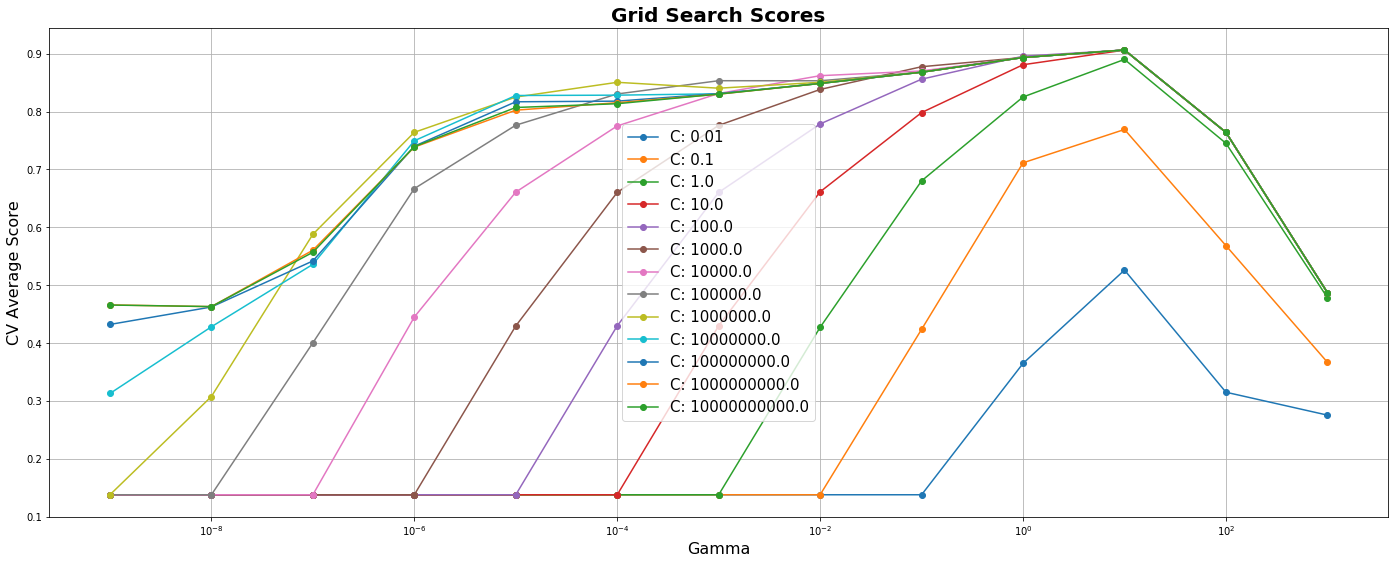

In [10]:
plot_grid_search(top_model.cv_results_,gamma_range,C_range,'Gamma','C')
figure = plt.gcf()
figure.set_size_inches(24, 9)
plt.show()

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


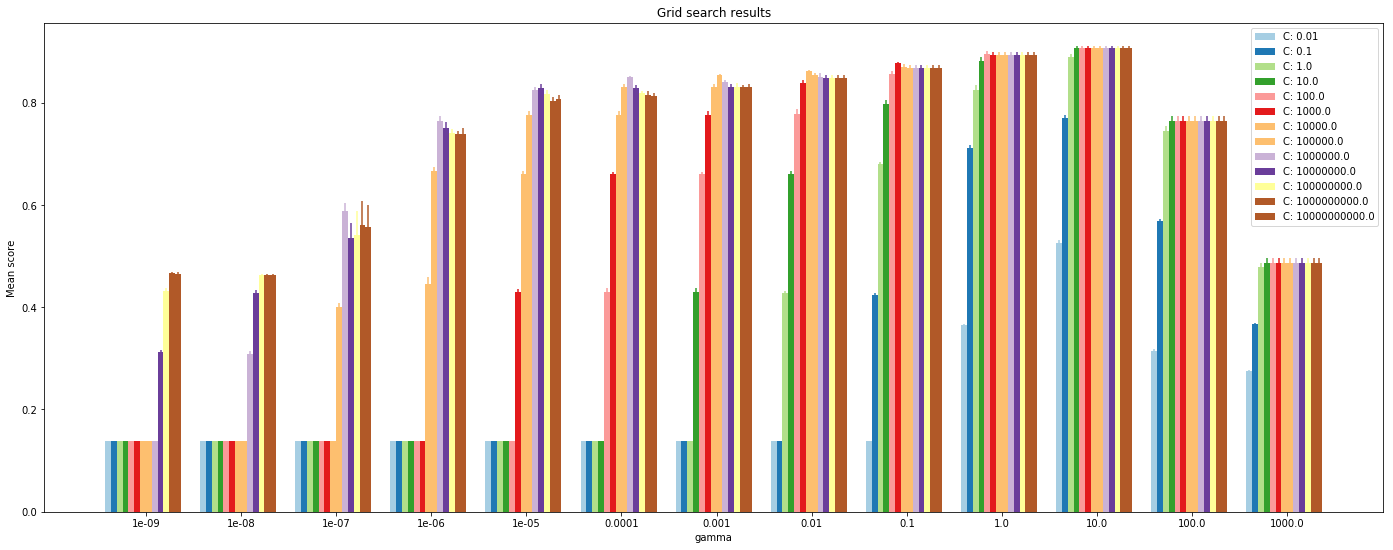

In [11]:
skplot.grid_search(top_model.grid_scores_, change='gamma', kind='bar')
figure = plt.gcf()
figure.set_size_inches(24, 9)
plt.show()

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


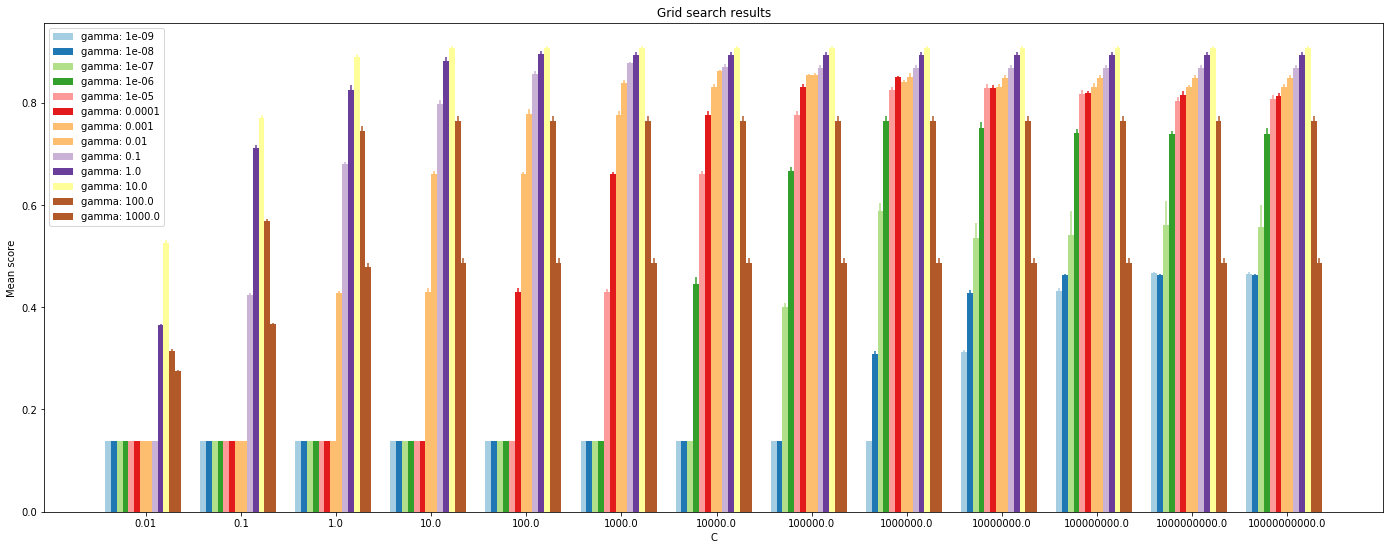

In [12]:
skplot.grid_search(top_model.grid_scores_, change='C', kind='bar')
figure = plt.gcf()
figure.set_size_inches(24, 9)
plt.show()

In [13]:
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=1)
svm_model = svm.SVC(C=top_model.best_params_['C'],gamma=top_model.best_params_['gamma'])
train_sizes = np.linspace(.1, 1.0, 10)
train_sizes, train_scores, test_scores = learning_curve(svm_model, X, y, cv=cv, n_jobs=20, train_sizes=train_sizes)

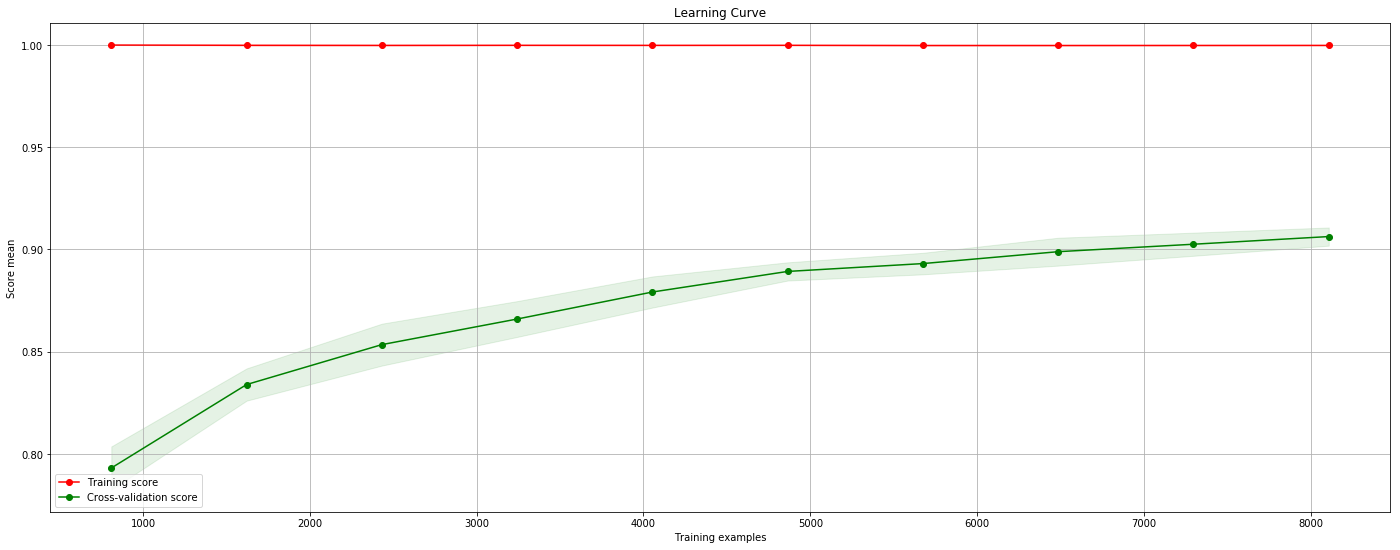

In [14]:
figure = plt.gcf()
figure.set_size_inches(24, 9)
skplot.learning_curve(train_scores, test_scores, train_sizes)
plt.show()